<a href="https://colab.research.google.com/github/starminalush/ml_course_2022/blob/master/lesson9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорты

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

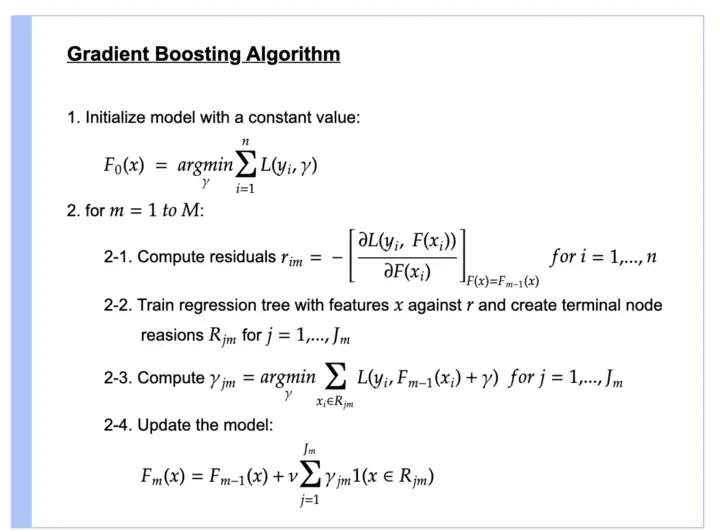

Реализация кастомного GradientBoosting

In [6]:
class CustomGradientBoostingRegressor:
    
    def __init__(self, learning_rate, n_estimators, max_depth=1):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []
        
    def fit(self, X, y):
        #шаг 1
        self.F0 = y.mean()
        Fm = self.F0

        for i in range(self.n_estimators):
          r = y - Fm #2.1
          #2.2
          tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)
          tree.fit(X, r)
          #2.3
          gamma = tree.predict(X)
          #2.4
          Fm = Fm + self.learning_rate * gamma

          self.trees.append(tree)
    
            
    def predict(self, X):
        
        Fm = self.F0
        
        for i in range(self.n_estimators):
            Fm += self.learning_rate * self.trees[i].predict(X)
            
        return Fm

Генерим данные

In [3]:
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

# just random uniform distributions in differnt range

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))

Визуализируем данные

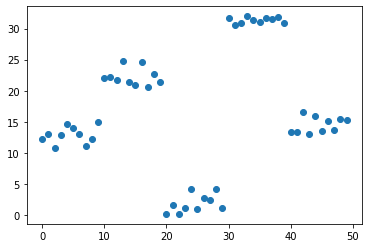

In [4]:
plt.scatter(x,y)

Обучим кастомный градиентный бустинг и реализацию из sklearn, сравним rmse

Кастомная модель

In [8]:
custom_gbm = CustomGradientBoostingRegressor(n_estimators = 20, learning_rate=0.1, max_depth = 1)
custom_gbm.fit(x, y)
y_pred = custom_gbm.predict(x)

In [9]:
mean_squared_error(y, y_pred, squared=False)

7.848808527482715

Модель Sklearn

In [12]:
sklearn_gbm = GradientBoostingRegressor(n_estimators = 20, learning_rate=0.1, max_depth = 1)
sklearn_gbm.fit(x, y)
y_pred = sklearn_gbm.predict(x)

In [13]:
mean_squared_error(y, y_pred, squared=False)

7.848808527482715

Рассмотрим XGBoost

In [33]:
df = pd.read_csv('csgo_round_snapshots.csv')
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [15]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [17]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [18]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

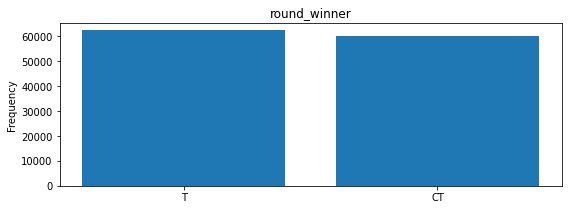

round_winner: 
 T     62406
CT    60004
Name: round_winner, dtype: int64


In [19]:
bar_plot('round_winner')

Главное о данных для XGBoost:

    Numeric features should be scaled
    Categorical features should be encoded

In [34]:
df = pd.get_dummies(df, columns = ['map', 'bomb_planted'])
df.head()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,bomb_planted_False,bomb_planted_True
0,175.00,0.0,0.0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,156.03,0.0,0.0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,96.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,76.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,174.97,1.0,0.0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,...,0,1,0,0,0,0,0,0,1,0


In [35]:
test = df.select_dtypes(include=['float64'])
scaler = StandardScaler()
data = scaler.fit_transform(test)
data

array([[ 1.41582771, -1.40057607, -1.40570151, ..., -0.81292903,
        -0.16335636, -0.15685461],
       [ 1.06753073, -1.40057607, -1.40570151, ..., -0.81292903,
        -0.16335636, -0.15685461],
       [-0.03409385, -1.40057607, -1.40570151, ..., -0.81292903,
        -0.16335636, -0.15685461],
       ...,
       [ 0.31291789,  0.89571055,  1.70405824, ...,  2.19325316,
        -0.16335636, -0.15685461],
       [-0.0542903 ,  0.89571055,  1.70405824, ...,  1.59201672,
        -0.16335636, -0.15685461],
       [-0.4214985 ,  0.89571055,  1.70405824, ...,  0.99078028,
        -0.16335636, -0.15685461]])

In [36]:
df[test.columns.tolist()] = data
df.head()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,bomb_planted_False,bomb_planted_True
0,1.415828,-1.400576,-1.405702,0.664386,0.695301,-1.836777,-1.709542,-0.516186,-0.595345,-1.115364,...,0,1,0,0,0,0,0,0,1,0
1,1.067531,-1.400576,-1.405702,0.664386,0.695301,0.502008,0.008909,-0.819351,-0.870776,-1.115364,...,0,1,0,0,0,0,0,0,1,0
2,-0.034094,-1.400576,-1.405702,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,-0.883109,-1.115364,...,0,1,0,0,0,0,0,0,1,0
3,-0.401302,-1.400576,-1.405702,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,-0.883109,-1.115364,...,0,1,0,0,0,0,0,0,1,0
4,1.415277,-1.191823,-1.405702,0.664386,0.695301,-0.714160,-1.709542,0.763351,-0.040372,-1.115364,...,0,1,0,0,0,0,0,0,1,0


In [37]:
df['round_winner'] = df['round_winner'].apply(lambda x: 1 if x == 'CT' else 0)
y = df['round_winner']
X = df.drop(['round_winner'], axis = 1)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
set(y_train)

{0, 1}

In [ ]:
#обучим xgboost

In [41]:
model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=50, booster='gbtree', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74     18669
           1       0.72      0.80      0.76     18054

    accuracy                           0.75     36723
   macro avg       0.75      0.75      0.75     36723
weighted avg       0.75      0.75      0.75     36723



In [40]:
model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
#подбор гиперпараметров xgboost

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
params = {
    'max_depth': [1, 2, 3],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50,100]
}
clf  = GridSearchCV(XGBClassifier(), param_grid=params, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)
best_combination  = clf.best_params_

KeyboardInterrupt: ignored

In [ ]:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

In [46]:
best_xgboost = XGBClassifier(learning_rate = 0.2, max_depth = 3, n_estimators = 100)

best_xgboost.fit(X_train, y_train)
y_pred = best_xgboost.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     18669
           1       0.74      0.79      0.77     18054

    accuracy                           0.76     36723
   macro avg       0.76      0.76      0.76     36723
weighted avg       0.76      0.76      0.76     36723



Catboost

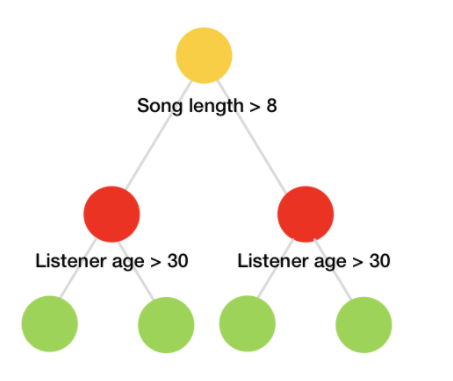

In [48]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [49]:
df = pd.read_csv('csgo_round_snapshots.csv')
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [53]:
y = df['round_winner']
X = df.drop(['round_winner'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
import catboost


model = catboost.CatBoostClassifier(iterations=20, learning_rate=0.1, depth=2, random_seed=42, max_leaves=5, grow_policy='Lossguide')


cat_features  = ['map', 'bomb_planted']

model.fit(X_train, y_train, cat_features=cat_features)

y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

0:	learn: 0.6624101	total: 109ms	remaining: 2.07s
1:	learn: 0.6408224	total: 167ms	remaining: 1.5s
2:	learn: 0.6190385	total: 225ms	remaining: 1.27s
3:	learn: 0.6041020	total: 281ms	remaining: 1.12s
4:	learn: 0.5931463	total: 340ms	remaining: 1.02s
5:	learn: 0.5844719	total: 408ms	remaining: 951ms
6:	learn: 0.5746563	total: 483ms	remaining: 897ms
7:	learn: 0.5649574	total: 541ms	remaining: 811ms
8:	learn: 0.5587338	total: 609ms	remaining: 745ms
9:	learn: 0.5523859	total: 676ms	remaining: 676ms
10:	learn: 0.5462384	total: 736ms	remaining: 602ms
11:	learn: 0.5412648	total: 793ms	remaining: 528ms
12:	learn: 0.5362493	total: 852ms	remaining: 459ms
13:	learn: 0.5331056	total: 908ms	remaining: 389ms
14:	learn: 0.5286305	total: 964ms	remaining: 321ms
15:	learn: 0.5254100	total: 1.02s	remaining: 255ms
16:	learn: 0.5228996	total: 1.08s	remaining: 191ms
17:	learn: 0.5203664	total: 1.14s	remaining: 127ms
18:	learn: 0.5175532	total: 1.2s	remaining: 63.3ms
19:	learn: 0.5146614	total: 1.26s	remainin

In [55]:
model = catboost.CatBoostClassifier()


cat_features  = ['map', 'bomb_planted']

model.fit(X_train, y_train, cat_features=cat_features)

y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

Learning rate set to 0.068911
0:	learn: 0.6628581	total: 140ms	remaining: 2m 19s
1:	learn: 0.6350768	total: 310ms	remaining: 2m 34s
2:	learn: 0.6137300	total: 442ms	remaining: 2m 26s
3:	learn: 0.5939307	total: 589ms	remaining: 2m 26s
4:	learn: 0.5784585	total: 745ms	remaining: 2m 28s
5:	learn: 0.5630093	total: 907ms	remaining: 2m 30s
6:	learn: 0.5520553	total: 1.09s	remaining: 2m 34s
7:	learn: 0.5432936	total: 1.4s	remaining: 2m 53s
8:	learn: 0.5340561	total: 1.67s	remaining: 3m 3s
9:	learn: 0.5262745	total: 1.84s	remaining: 3m 1s
10:	learn: 0.5189678	total: 1.92s	remaining: 2m 53s
11:	learn: 0.5134233	total: 2.01s	remaining: 2m 45s
12:	learn: 0.5077460	total: 2.08s	remaining: 2m 37s
13:	learn: 0.5030893	total: 2.16s	remaining: 2m 31s
14:	learn: 0.4992287	total: 2.23s	remaining: 2m 26s
15:	learn: 0.4959262	total: 2.31s	remaining: 2m 22s
16:	learn: 0.4931219	total: 2.39s	remaining: 2m 18s
17:	learn: 0.4898466	total: 2.46s	remaining: 2m 14s
18:	learn: 0.4861525	total: 2.54s	remaining: 2m

In [60]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [62]:
pool = catboost.Pool(X, y, cat_features=[3,4], feature_names=list(X.columns))

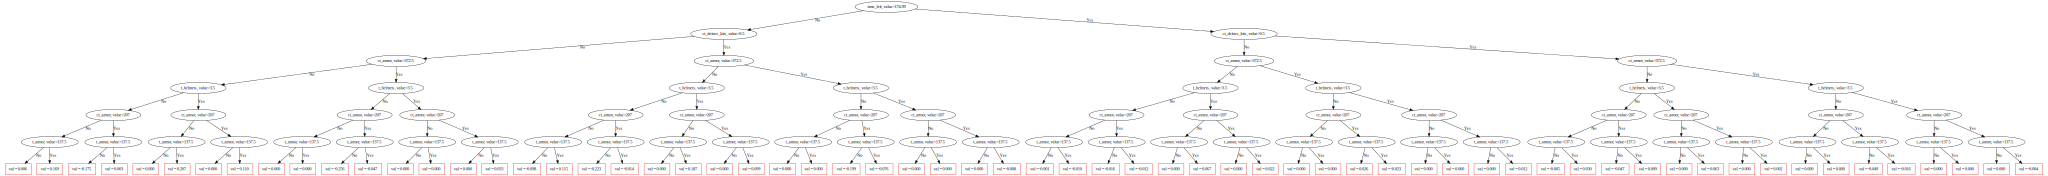

In [63]:
model.plot_tree(0, pool=pool)

In [66]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=Min